# Sample looping

Finding good looping points for each sample.

In [1]:
from numpy import *
from matplotlib.pyplot import *
from scipy import signal
import scipy.io.wavfile

In [27]:
def zcd(x, rising=True):
    # Find all indexes just before a zero-crossing
    if rising:
        return where(0 < diff(sign(x)))[0]
    else:
        return where(0 > diff(sign(x)))[0]

In [28]:
fs, x = scipy.io.wavfile.read("../app/sound/volca_c4.wav")
f = 2*261.63
t = arange(len(x))/fs

In [29]:
# Ranges to search for loop points in
N = len(x)
search_loop_start = [int(0.3*N), int(0.4*N)]
search_loop_stop = [int(0.7*N), int(0.9*N)]

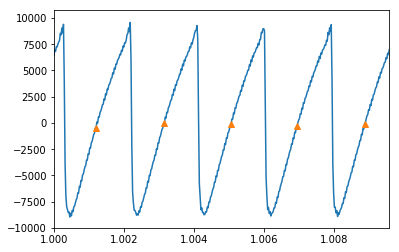

In [38]:
# Show zero-crossing algorighm
plot(t, x)
zc = zcd(x, rising=True)
plot(t[zc], x[zc], "^")
xlim(1+0, 1+5/f);

(-0.005733287467033597, 0.005733287467033597)

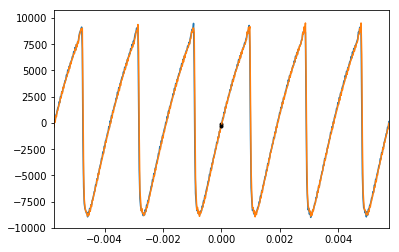

In [55]:
# Find the closest-to-zero zero-crossing within start and stop range

zc_start = min([X for X in zc if ((search_loop_start[0]<=X) & (X<=search_loop_start[1]))])
zc_stop = min([X for X in zc if ((search_loop_stop[0]<=X) & (X<=search_loop_stop[1]))])

for n in [zc_start, zc_stop]:
    t_ = t - t[n]
    plot(t_, x)
    plot(0, x[n], marker=".", color="k")

xlim(-3/f, 3/f)